<a href="https://colab.research.google.com/github/shriyamuthyala/EDA/blob/main/EDAproject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/Nigerian_Road_Traffic_Crashes_2020_2024.csv')
data.head(5)

,Quarter,State,Total_Crashes,Num_Injured,Num_Killed,Total_Vehicles_Involved,SPV,DAD,PWR,FTQ,Other_Factors
0,Q4 2020,Abia,30,146,31,37,19,0,0,0,18
1,Q4 2020,Adamawa,77,234,36,94,57,0,0,0,37
2,Q4 2020,Akwa Ibom,22,28,7,24,15,0,0,1,8
3,Q4 2020,Anambra,72,152,20,83,43,1,0,0,39
4,Q4 2020,Bauchi,154,685,90,140,74,0,0,0,66


In [3]:
#data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Quarter                  518 non-null    object
 1   State                    518 non-null    object
 2   Total_Crashes            518 non-null    int64 
 3   Num_Injured              518 non-null    int64 
 4   Num_Killed               518 non-null    int64 
 5   Total_Vehicles_Involved  518 non-null    int64 
 6   SPV                      518 non-null    int64 
 7   DAD                      518 non-null    int64 
 8   PWR                      518 non-null    int64 
 9   FTQ                      518 non-null    int64 
 10  Other_Factors            518 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 44.6+ KB


We observed there are only 518 non-null rows for all 11 colums and there are only 2 categorical columns.

In [4]:
#statisticalsummary - It gives inf of only numerical values
data.describe()
#or for every column
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Quarter,518,14,Q4 2020,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,518,37,Abia,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Crashes,518.0,NaN,NaN,NaN,83.517375,77.023061,1.0,30.0,58.0,107.75,538.0
Num_Injured,518.0,NaN,NaN,NaN,245.631274,201.131483,2.0,96.25,185.5,331.5,1149.0
Num_Killed,518.0,NaN,NaN,NaN,40.600386,36.858302,0.0,15.0,30.0,55.75,224.0
Total_Vehicles_Involved,518.0,NaN,NaN,NaN,100.667954,108.567113,0.0,32.0,64.0,134.75,864.0
SPV,518.0,NaN,NaN,NaN,37.903475,57.093042,0.0,0.0,15.0,55.0,340.0
DAD,518.0,NaN,NaN,NaN,0.140927,0.45432,0.0,0.0,0.0,0.0,4.0
PWR,518.0,NaN,NaN,NaN,0.355212,1.677385,0.0,0.0,0.0,0.0,25.0
FTQ,518.0,NaN,NaN,NaN,23.824324,51.024267,0.0,0.0,0.0,21.0,425.0


In [5]:
#missing values
data.isnull().sum()

,0
Quarter,0
State,0
Total_Crashes,0
Num_Injured,0
Num_Killed,0
Total_Vehicles_Involved,0
SPV,0
DAD,0
PWR,0
FTQ,0


univariate analysis  
1.focusses on single column
2.categorical
3.numerical

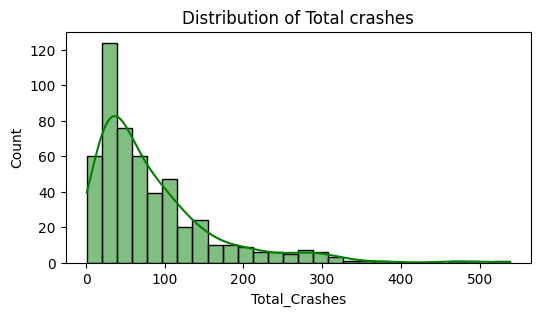

In [6]:
#distribution of total crashes
plt.figure(figsize=(6,3))
sns.histplot(data['Total_Crashes'],kde=True,color='green')
plt.title('Distribution of Total crashes')
plt.show()

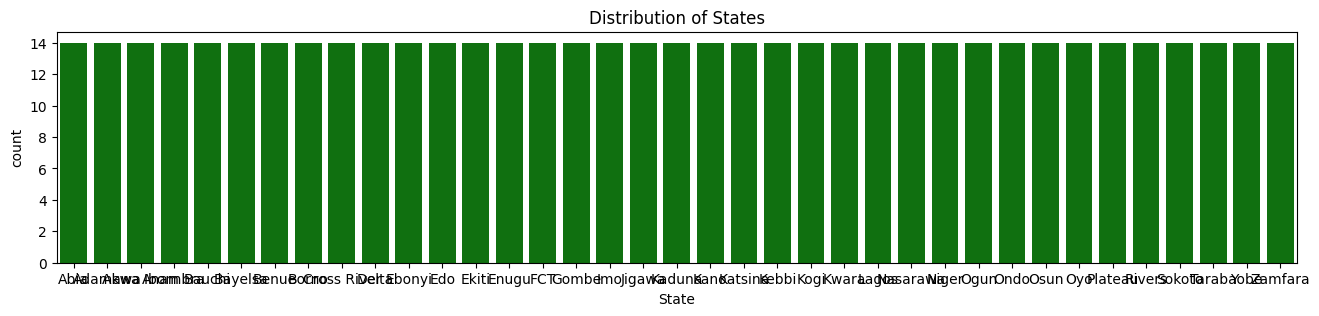

In [7]:
#count plot
plt.figure(figsize=(16,3))
sns.countplot(x='State',data=data,color='green')
plt.title('Distribution of States')
plt.show()

<ipython-input-8-3c87a7b67c2f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='State',data=data,order=orders,palette='viridis')


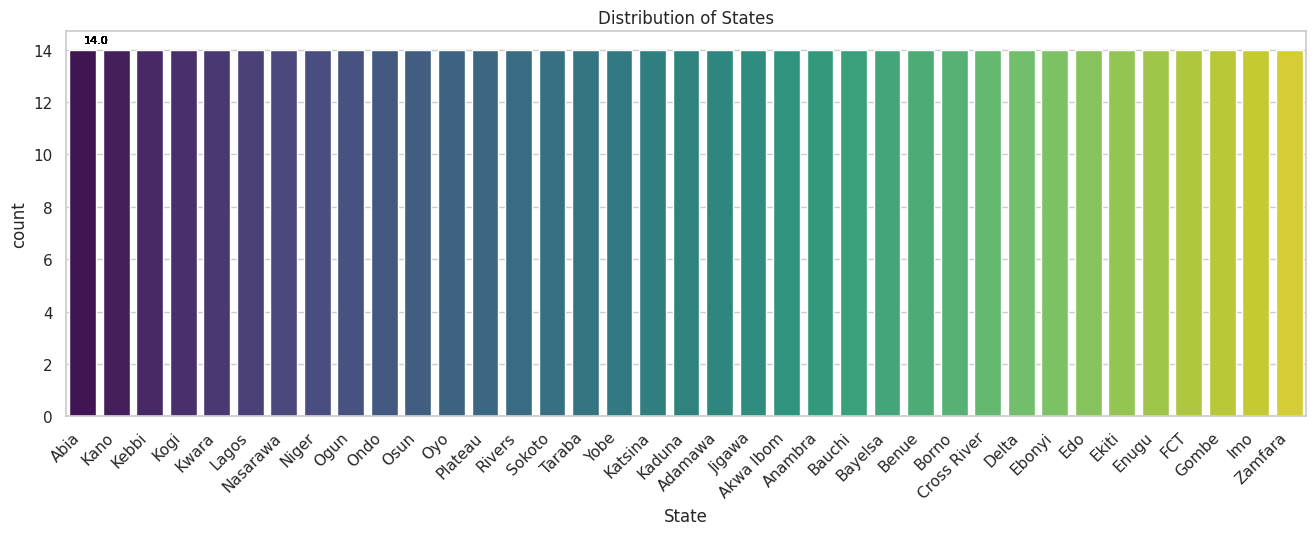

In [8]:
sns.set(style='whitegrid')
plt.figure(figsize=(16,5))
orders = data['State'].value_counts().index
sns.countplot(x='State',data=data,order=orders,palette='viridis')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',(p.get_width()/2.,p.get_height()),ha='center',va='baseline',fontsize=8,color='black',xytext=(0,5),textcoords='offset points')
plt.xticks(rotation=45,ha='right')
plt.title('Distribution of States')
plt.show()

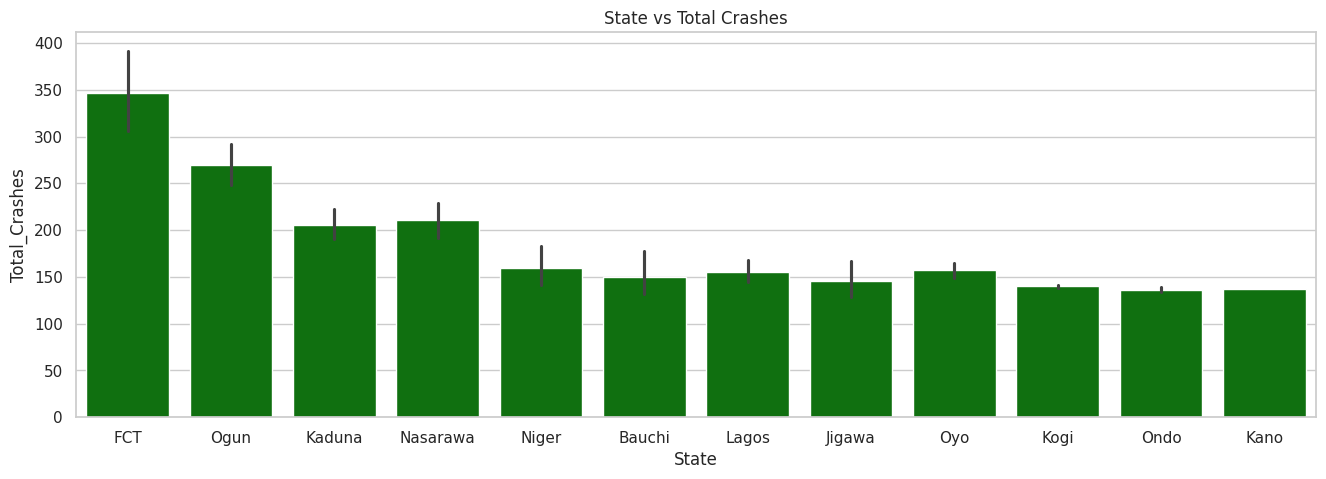

In [9]:
#bivariate analysis
#State vs Total crashes
plt.figure(figsize=(16,5))
sorted = data.sort_values(by='Total_Crashes',ascending=False).head(100)
sns.barplot(x='State',y='Total_Crashes',data=sorted,color='green')
plt.title('State vs Total Crashes')
plt.show()

In [10]:
data['Year']=data['Quarter'].apply(lambda x: x.split()[1])
data['Quarter']=data['Quarter'].apply(lambda x: x.split()[0])
data.head()

,Quarter,State,Total_Crashes,Num_Injured,Num_Killed,Total_Vehicles_Involved,SPV,DAD,PWR,FTQ,Other_Factors,Year
0,Q4,Abia,30,146,31,37,19,0,0,0,18,2020
1,Q4,Adamawa,77,234,36,94,57,0,0,0,37,2020
2,Q4,Akwa Ibom,22,28,7,24,15,0,0,1,8,2020
3,Q4,Anambra,72,152,20,83,43,1,0,0,39,2020
4,Q4,Bauchi,154,685,90,140,74,0,0,0,66,2020


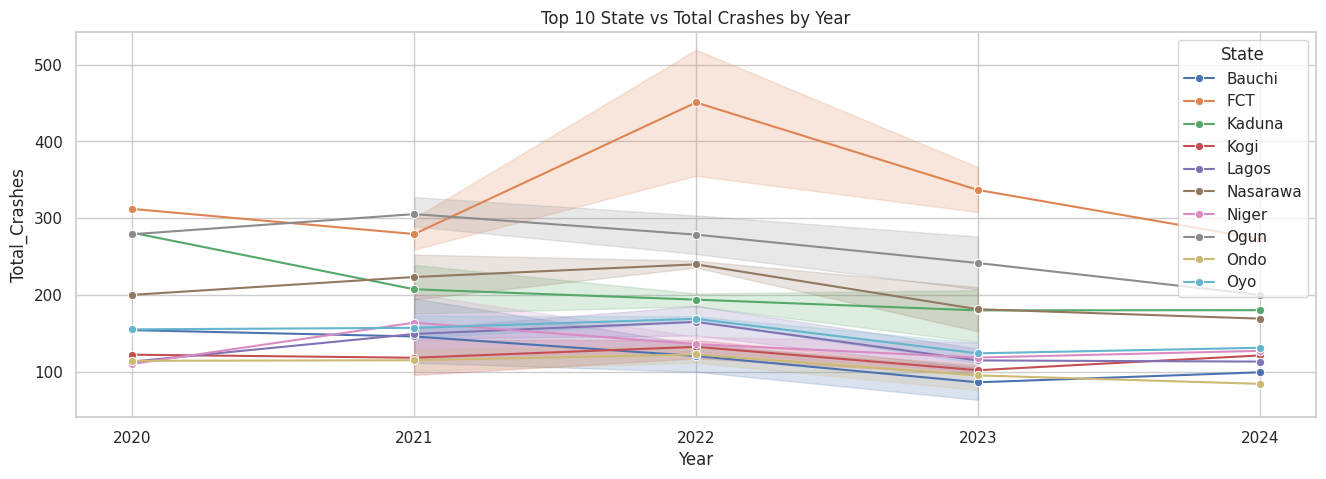

In [11]:
#multivariate analysis
top_states=data.groupby('State')['Total_Crashes'].sum().nlargest(10).index
top_10=data[data['State'].isin(top_states)]
plt.figure(figsize=(16,5))
sns.lineplot(x='Year',y='Total_Crashes',data=top_10,hue='State',marker='o')
plt.title('Top 10 State vs Total Crashes by Year')
plt.show()

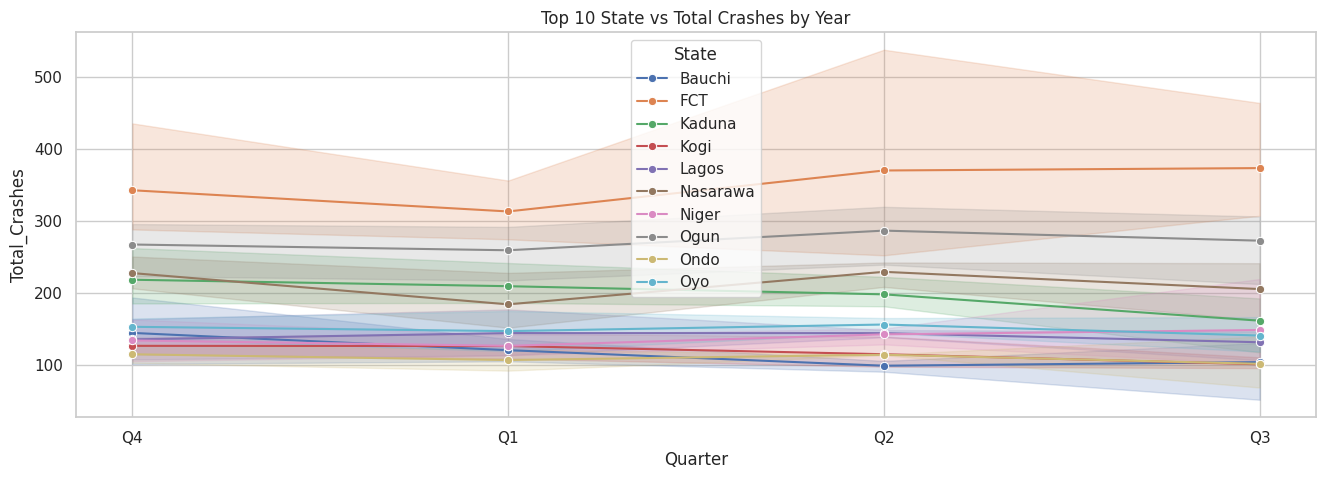

In [12]:
top_states=data.groupby('State')['Total_Crashes'].sum().nlargest(10).index
top_10=data[data['State'].isin(top_states)]
plt.figure(figsize=(16,5))
sns.lineplot(x='Quarter',y='Total_Crashes',data=top_10,hue='State',marker='o')
plt.title('Top 10 State vs Total Crashes by Year')
plt.show()

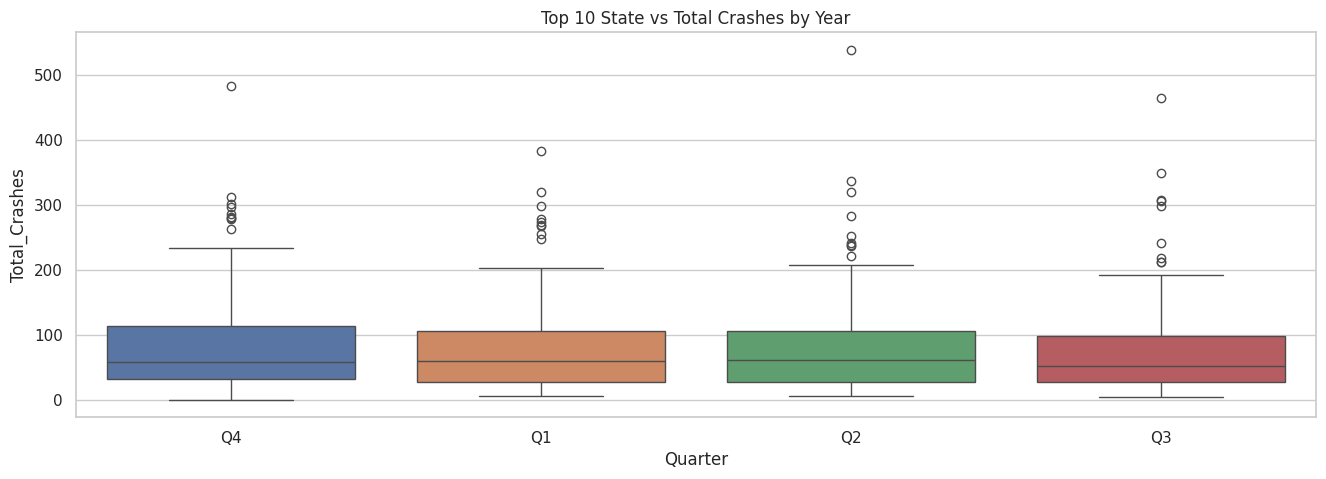

In [13]:
#Quarter vs total_crashes
plt.figure(figsize=(16,5))
sns.boxplot(x='Quarter',y='Total_Crashes',data=data,hue='Quarter')
plt.title('Top 10 State vs Total Crashes by Year')
plt.show()

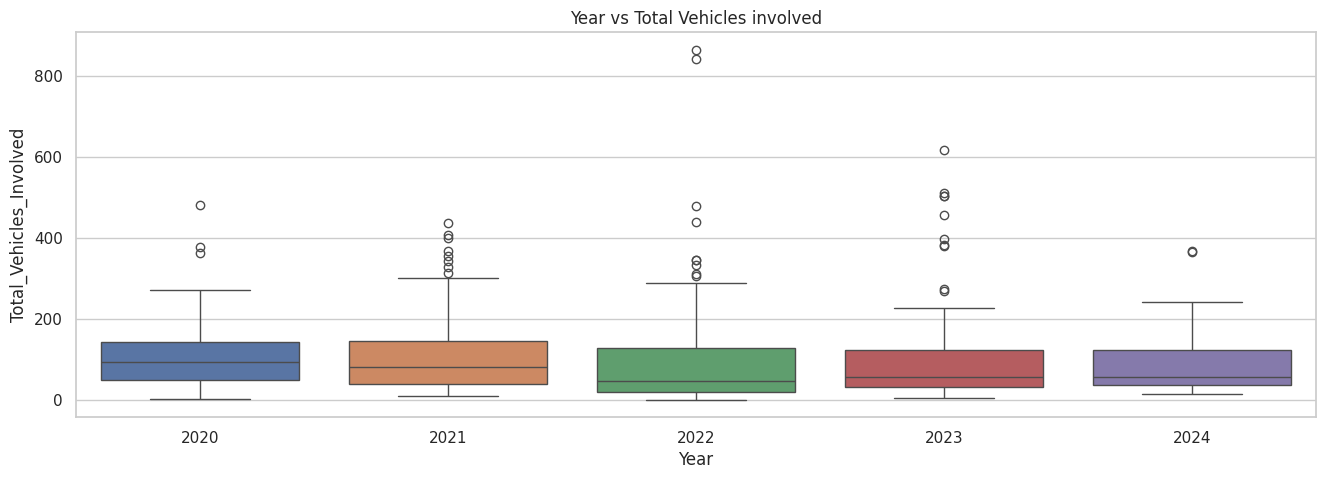

In [14]:

plt.figure(figsize=(16,5))
sns.boxplot(x='Year',y='Total_Vehicles_Involved',data=data,hue='Year')
plt.title('Year vs Total Vehicles involved')
plt.show()

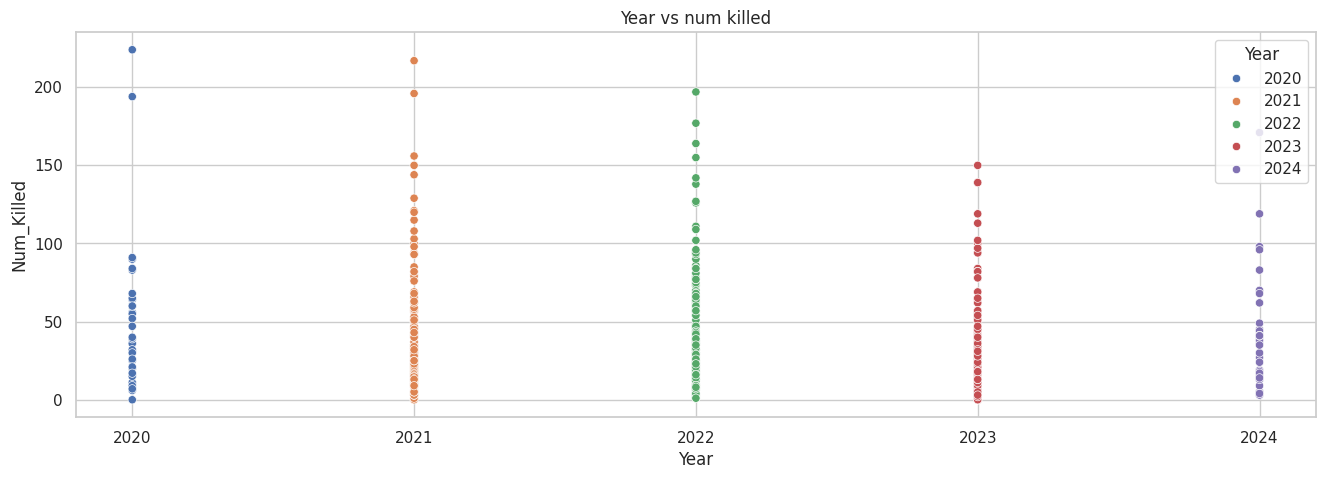

In [15]:
plt.figure(figsize=(16,5))
sns.scatterplot(x='Year',y='Num_Killed',data=data,hue='Year')
plt.title('Year vs num killed')
plt.show()

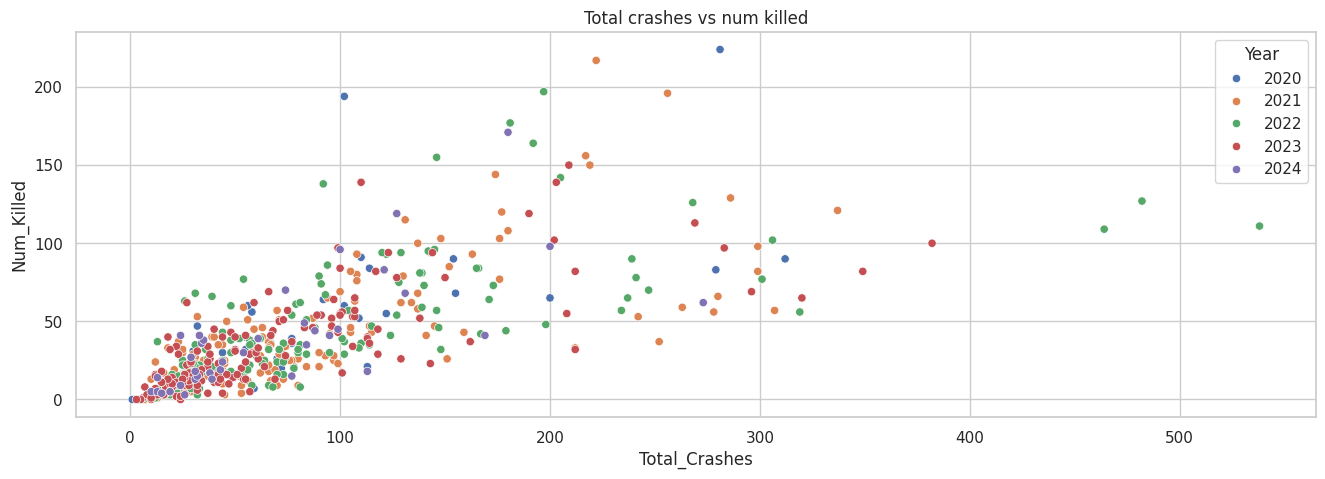

In [16]:
plt.figure(figsize=(16,5))
sns.scatterplot(x='Total_Crashes',y='Num_Killed',data=data,hue='Year')
plt.title('Total crashes vs num killed')
plt.show()

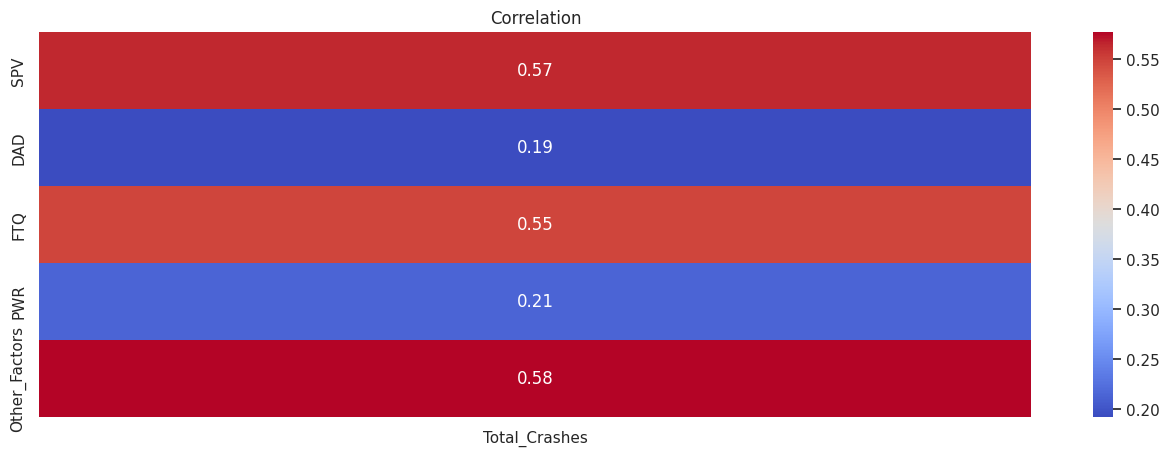

In [17]:
#HeatMap
corr_rel = data[['Total_Crashes','SPV','DAD','FTQ','PWR','Other_Factors']].corr()
corr_data=corr_rel[['Total_Crashes']].loc[['SPV','DAD','FTQ','PWR','Other_Factors']]
plt.figure(figsize=(16,5))
sns.heatmap(corr_data,annot=True,cmap='coolwarm')
plt.title('Correlation')
plt.show()